## Aprendizaje de reglas de asociación

### Ferraro, María Eugenia

### Aclaración: Informe al final de la notebook .-

#### Trabajo Práctico:

1)  Obtener reglas de asociación entre películas en el dataset movielens, al estilo de: https://rpubs.com/vitidN/203264 pero usando la notebook de reglas de asociación de Valeria

2) Aplicar diferentes métricas para ordenamiento de las reglas

3) Hacer un pequeño informe (entre 200 y 500 palabras, puede ser más pero no mucho más) de interpretación de los efectos de las métricas aplicadas


Objetivo:
    
    derivar reglas de la forma {A} -> {B}
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, groupby
from collections import Counter

In [2]:
movies = pd.read_csv('ml-20m/movies.csv')
ratings = pd.read_csv('ml-20m/ratings.csv')

In [3]:
movies.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
movies['title'] = movies.title.str.rstrip()
movies['year'] = movies.title.str[-5:-1]

In [6]:
pd.set_option('max_colwidth', 1000)
movies[movies.year.str.isnumeric()==False][['title','year']]

,title,year
10593,Babylon 5,lon
15646,"Millions Game, The (Das Millionenspiel)",piel
17341,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",poma
19859,Mona and the Time of Burning Love (Mona ja palavan rakkauden aika) (1983)),983)
22368,Diplomatic Immunity (2009– ),09–
22669,"Big Bang Theory, The (2007-)",007-
23617,Brazil: In the Shadow of the Stadiums,dium
23824,Slaying the Badger,adge
24286,Tatort: Im Schmerz geboren,bore
24412,National Theatre Live: Frankenstein,stei


In [7]:
movieId_descartada = movies[movies.year.str.isnumeric()==False].movieId.tolist() 

In [8]:
movies = movies[movies.movieId.isin(movieId_descartada)==False]
movies['title'] = movies.title.str[:-7]

In [9]:
movies[movies.movieId.isin(movieId_descartada)]

,movieId,title,genres,year


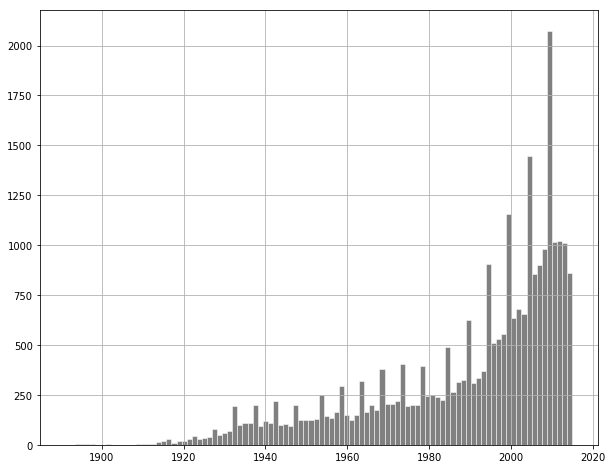

In [10]:
plt.figure(figsize=(10,8))
sns.set_style()
movies.year.astype(int).hist(bins=100,color='gray',edgecolor='white',lw=0.5)

Qué interesante, cada 4 años se estrena el doble de películas que la media de estrenos en los años que le anteceden

In [11]:
ratings = ratings[ratings.movieId.isin(movieId_descartada)==False]

In [12]:
n_transacciones = len(ratings.userId.unique())
print('Considerando como transacción al subconjunto de películas votadas por un usuario,\n\
la cantidad de transacciones vendrá dada por el número de usuarios presentes en la base ratings,\n\
lo que da un total de: ', n_transacciones,' transacciones')

Considerando como transacción al subconjunto de películas votadas por un usuario,
la cantidad de transacciones vendrá dada por el número de usuarios presentes en la base ratings,
lo que da un total de:  138493  transacciones


In [13]:
ratings.groupby('userId').userId.count().sort_values(ascending=False).head(10)

userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5444
34576     5356
131904    5329
83090     5169
59477     4987
Name: userId, dtype: int64

In [14]:
ratings.groupby('movieId').movieId.count().sort_values(ascending=False).head(10)

movieId
296     67310
356     66172
318     63366
593     63299
480     59715
260     54502
110     53769
589     52244
2571    51334
527     50054
Name: movieId, dtype: int64

In [15]:
#corroboro que no haya datos duplicados
ratings.groupby(['userId','movieId']).rating.count().describe()

count    20000085.0
mean            1.0
std             0.0
min             1.0
25%             1.0
50%             1.0
75%             1.0
max             1.0
Name: rating, dtype: float64

In [16]:
ratings.groupby('movieId').rating.count().describe()

count    26722.000000
mean       748.450153
std       3087.015232
min          1.000000
25%          3.000000
50%         18.000000
75%        205.000000
max      67310.000000
Name: rating, dtype: float64

In [17]:
movie_apriori = ratings.groupby('movieId').rating.count().reset_index().rename(columns={'rating':'apriori'}).sort_values('apriori',ascending=False)

In [18]:
movie_apriori.apriori = movie_apriori.apriori/n_transacciones

In [19]:
movie_apriori.head(10)

,movieId,apriori
293,296,0.486017
352,356,0.477800
315,318,0.457539
587,593,0.457056
476,480,0.431177
257,260,0.393536
108,110,0.388243
583,589,0.377232
2486,2571,0.370661
523,527,0.361419


In [20]:
print(movie_apriori.apriori.describe())
mediana = movie_apriori.apriori.describe()['50%']

count    26722.000000
mean         0.005404
std          0.022290
min          0.000007
25%          0.000022
50%          0.000130
75%          0.001480
max          0.486017
Name: apriori, dtype: float64


#### COMENTARIOS:

1. Como primera observación, teniendo en cuenta la descripción estadística de las películas votadas, 534 películas no han sido elegidas por ningún votante.

2. Por otro lado, la probabilidad apriori media (es decir la frecuencia media de aparición de una película entre todas las transacciones) es 0.005, mientras que la mediana es menor, e igual a 0.00013. Esto nos dice que el 50% de las películas aparece a lo sumo, una vez cada ~10000 votantes, lo cual es muy bajo.


Dicho esto, se utilizará como medida de soporte que la probabilidad apriori de una dada película sea mayor a la mediana

In [22]:
movieId_para_analisis = movie_apriori[movie_apriori.apriori>mediana].movieId.tolist()

In [23]:
ratings = ratings[ratings.movieId.isin(movieId_para_analisis)]

In [23]:
ratings_sort=ratings.sort_values(['userId','movieId'])
ratings_sort.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [24]:
#muestra = ratings.sample(frac=0.1, random_state=113)

In [24]:
transacciones = ratings_sort[['userId','movieId']].groupby('userId').agg(lambda col: col.tolist()).reset_index()

In [27]:
transacciones.head(10)

,userId,movieId
0,1,"[2, 29, 32, 47, 50, 112, 151, 223, 253, 260, 293, 296, 318, 337, 367, 541, 589, 593, 653, 919, 924, 1009, 1036, 1079, 1080, 1089, 1090, 1097, 1136, 1193, 1196, 1198, 1200, 1201, 1208, 1214, 1215, 1217, 1219, 1222, 1240, 1243, 1246, 1249, 1258, 1259, 1261, 1262, 1266, 1278, 1291, 1304, 1321, 1333, 1348, 1350, 1358, 1370, 1374, 1387, 1525, 1584, 1750, 1848, 1920, 1967, 1994, 1997, 2021, 2100, 2118, 2138, 2140, 2143, 2173, 2174, 2193, 2194, 2253, 2288, 2291, 2542, 2628, 2644, 2648, 2664, 2683, 2692, 2716, 2761, 2762, 2804, 2872, 2918, 2944, 2947, 2959, 2968, 3000, 3030, ...]"
1,2,"[3, 62, 70, 110, 242, 260, 266, 469, 480, 541, 589, 891, 908, 924, 1121, 1196, 1210, 1214, 1249, 1259, 1270, 1327, 1356, 1544, 1580, 1673, 1748, 1965, 1969, 1970, 1971, 1972, 1973, 1974, 1986, 2291, 2454, 2455, 2791, 2858, 2948, 2951, 3150, 3159, 3173, 3450, 3513, 3534, 3555, 3565, 3703, 3753, 3917, 3918, 3923, 3926, 3927, 3928, 3930, 3937, 3959]"
2,3,"[1, 24, 32, 50, 160, 173, 175, 196, 223, 260, 316, 318, 329, 337, 440, 442, 457, 480, 490, 512, 541, 589, 593, 610, 718, 780, 788, 858, 904, 905, 919, 924, 953, 968, 1037, 1060, 1073, 1077, 1079, 1084, 1089, 1094, 1097, 1103, 1125, 1127, 1129, 1179, 1188, 1193, 1196, 1197, 1198, 1199, 1200, 1206, 1208, 1210, 1213, 1214, 1215, 1219, 1220, 1221, 1222, 1225, 1228, 1230, 1240, 1242, 1247, 1257, 1258, 1259, 1261, 1266, 1270, 1272, 1276, 1278, 1288, 1304, 1307, 1321, 1330, 1333, 1345, 1356, 1372, 1373, 1374, 1375, 1376, 1396, 1544, 1584, 1603, 1653, 1674, 1676, ...]"
3,4,"[6, 10, 19, 32, 165, 329, 350, 356, 367, 368, 370, 377, 380, 420, 431, 440, 454, 480, 489, 519, 520, 531, 548, 586, 589, 594, 596, 733]"
4,5,"[2, 11, 17, 60, 62, 104, 110, 140, 141, 150, 224, 235, 260, 282, 316, 318, 350, 364, 367, 368, 370, 376, 377, 380, 440, 454, 457, 475, 480, 491, 500, 508, 515, 529, 531, 587, 588, 589, 590, 593, 594, 595, 608, 631, 648, 671, 708, 720, 736, 780, 788, 832, 1028, 1035, 1036, 1042, 1073, 1079, 1080, 1097, 1136, 1196, 1198, 1210, 1291, 1393]"
5,6,"[1, 3, 7, 17, 52, 62, 135, 140, 141, 260, 494, 628, 648, 653, 708, 719, 733, 736, 743, 762, 780, 788, 802, 1073]"
6,7,"[3, 7, 11, 15, 16, 17, 24, 105, 122, 151, 252, 260, 271, 276, 316, 339, 348, 351, 355, 356, 357, 362, 364, 377, 425, 440, 480, 509, 539, 553, 587, 589, 590, 597, 674, 708, 736, 750, 780, 788, 806, 852, 880, 899, 908, 912, 914, 920, 922, 924, 928, 932, 952, 1017, 1020, 1077, 1094, 1095, 1097, 1101, 1183, 1196, 1206, 1210, 1230, 1247, 1253, 1256, 1259, 1265, 1270, 1271, 1272, 1301, 1307, 1343, 1357, 1385, 1391, 1393, 1408, 1409, 1441, 1449, 1466, 1513, 1517, 1544, 1573, 1580, 1597, 1617, 1674, 1682, 1721, 1777, 1882, 1888, 1894, 1911, ...]"
7,8,"[1, 3, 6, 10, 19, 21, 39, 47, 48, 110, 150, 153, 161, 165, 168, 172, 173, 185, 207, 208, 231, 236, 253, 266, 276, 277, 288, 292, 296, 316, 329, 338, 339, 344, 349, 350, 353, 355, 356, 357, 364, 367, 372, 377, 380, 381, 434, 442, 454, 457, 480, 500, 508, 527, 539, 550, 551, 552, 553, 587, 588, 589, 590, 592, 593, 595, 597, 610, 648, 733]"
8,9,"[356, 858, 1219, 1911, 1923, 1997, 2279, 2605, 2683, 2688, 2706, 2710, 2719, 2722, 2840, 2841, 2959, 3016, 3785, 3798, 3857, 3908, 3979, 3994, 3999, 4022, 4030, 4034, 4148, 4369, 4483, 4502, 4509, 4519, 4533]"
9,10,"[1, 11, 25, 260, 356, 527, 858, 912, 969, 1094, 1136, 1196, 1198, 1204, 1208, 1210, 1221, 1222, 1230, 1240, 1242, 1247, 1250, 1304, 1387, 1721, 1960, 2028, 2058, 2194, 2384, 2529, 2657, 2797, 2944, 2948, 3062, 3107]"


In [28]:
matriz_transacciones = transacciones.movieId.tolist()

In [30]:
from efficient_apriori import apriori
#wARNING-CUIDADO!! no poner min_support pequeño como por ejempo 0.001!!
#min_support y min_confiden entre 0 y 1  
itemsets, rules = apriori(matriz_transacciones, min_support=0.3, min_confidence=0.3,max_length=2, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 26722 candidate itemsets of length 1.
  Found 27 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 351 candidate itemsets of length 2.
  Found 8 large itemsets of length 2.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



In [31]:
itemsets2, rules2 = apriori(matriz_transacciones, min_support=0.2, min_confidence=0.3,max_length=2, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 26722 candidate itemsets of length 1.
  Found 75 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 2775 candidate itemsets of length 2.
  Found 194 large itemsets of length 2.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



In [32]:
itemsets3, rules3 = apriori(matriz_transacciones, min_support=0.1, min_confidence=0.3,max_length=2, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 26722 candidate itemsets of length 1.
  Found 294 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 43071 candidate itemsets of length 2.
  Found 3892 large itemsets of length 2.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



In [60]:
movies_dict = dict(zip(movies.movieId.values,movies.title.values))
def rules_db(_rules,sort):
    rules_dic = []
    for i in range(len(_rules)):
        rules_dic.append({'antecedente':_rules[i].lhs[0],
                          'consecuente':_rules[i].rhs[0],
                          'soporte':round(_rules[i].support,2),
                          'confianza':round(_rules[i].confidence,2),
                          'conviccion':round(_rules[i].conviction,2),
                          'lift':round(_rules[i].lift,2)})
    rules_db_ = pd.DataFrame(rules_dic,columns=['antecedente',
                                           'consecuente',
                                           'soporte',
                                           'confianza',
                                           'conviccion',
                                           'lift'])
    rules_db_['antecedente'] = rules_db_.antecedente.map(movies_dict)
    rules_db_['consecuente'] = rules_db_.consecuente.map(movies_dict)
    return rules_db_.sort_values(sort,ascending=False)

In [34]:
metricas=['soporte','confianza','conviccion','lift']

In [63]:
print('*********************** SOPORTE MÍNIMO: 0.3 **************************\n')
for metrica in metricas:
    rules_ = rules_db(rules,metrica)
    print('ORDENAMIENTO BASADO EN: '+metrica.upper(),'\n\n',rules_[['antecedente','consecuente',metrica]].head(10),end='\n'+'-'*70+'\n\n\n')

*********************** SOPORTE MÍNIMO: 0.3 **************************

ORDENAMIENTO BASADO EN: SOPORTE 

                   antecedente                consecuente  soporte
2                Forrest Gump               Pulp Fiction     0.34
3                Pulp Fiction               Forrest Gump     0.34
6   Silence of the Lambs, The               Pulp Fiction     0.34
7                Pulp Fiction  Silence of the Lambs, The     0.34
12              Jurassic Park               Forrest Gump     0.34
13               Forrest Gump              Jurassic Park     0.34
0   Shawshank Redemption, The               Pulp Fiction     0.33
1                Pulp Fiction  Shawshank Redemption, The     0.33
14  Silence of the Lambs, The               Forrest Gump     0.32
15               Forrest Gump  Silence of the Lambs, The     0.32
----------------------------------------------------------------------


ORDENAMIENTO BASADO EN: CONFIANZA 

                   antecedente                consecuente 

In [114]:
print('*********************** SOPORTE MÍNIMO: 0.2 **************************\n')
for metrica in metricas:
    rules_ = rules_db(rules2,metrica)
    print('ORDENAMIENTO BASADO EN: '+metrica.upper(),'\n\n',rules_[['antecedente','consecuente',metrica]].head(10),end='\n'+'-'*70+'\n\n\n')

*********************** SOPORTE MÍNIMO: 0.2 **************************

ORDENAMIENTO BASADO EN: SOPORTE 

                    antecedente                consecuente  soporte
152  Silence of the Lambs, The               Pulp Fiction     0.34
212              Jurassic Park               Forrest Gump     0.34
213               Forrest Gump              Jurassic Park     0.34
132               Forrest Gump               Pulp Fiction     0.34
133               Pulp Fiction               Forrest Gump     0.34
153               Pulp Fiction  Silence of the Lambs, The     0.34
128  Shawshank Redemption, The               Pulp Fiction     0.33
129               Pulp Fiction  Shawshank Redemption, The     0.33
226  Silence of the Lambs, The               Forrest Gump     0.32
227               Forrest Gump  Silence of the Lambs, The     0.32
----------------------------------------------------------------------


ORDENAMIENTO BASADO EN: CONFIANZA 

                                         antece

In [115]:
print('*********************** SOPORTE MÍNIMO: 0.1 **************************\n')
for metrica in metricas:
    rules_ = rules_db(rules3,metrica)
    print('ORDENAMIENTO BASADO EN: '+metrica.upper(),'\n\n',rules_[['antecedente','consecuente',metrica]].head(10),end='\n'+'-'*70+'\n\n\n')

*********************** SOPORTE MÍNIMO: 0.1 **************************

ORDENAMIENTO BASADO EN: SOPORTE 

                     antecedente                consecuente  soporte
2818              Jurassic Park               Forrest Gump     0.34
2819               Forrest Gump              Jurassic Park     0.34
2243               Pulp Fiction  Silence of the Lambs, The     0.34
2242  Silence of the Lambs, The               Pulp Fiction     0.34
2196               Forrest Gump               Pulp Fiction     0.34
2197               Pulp Fiction               Forrest Gump     0.34
2187  Shawshank Redemption, The               Pulp Fiction     0.33
2188               Pulp Fiction  Shawshank Redemption, The     0.33
2843               Forrest Gump  Silence of the Lambs, The     0.32
2842  Silence of the Lambs, The               Forrest Gump     0.32
----------------------------------------------------------------------


ORDENAMIENTO BASADO EN: CONFIANZA 

                                    

In [ ]:
str(round(rules_db(rules,'soporte').soporte.values[0],2))+' | '+rules_db(rules,'soporte').antecedente.values[0][:10]+'->'+rules_db(rules,'soporte').consecuente.values[0][:10]

In [128]:
print('-'*102)
print(' '*40+'   SOPORTE MINIMO   '+' '*40)
print('-'*102)
print('METRICA    |'+' '*13+'0.3'+' '*13+'|'+' '*13+'0.2'+' '*13+'|'+' '*13+'0.1'+' '*13+'|')
print('-'*102)
print('SOPORTE    | '+str(round(rules_db(rules,'soporte').soporte.values[0],2))+'| '+rules_db(rules,'soporte').antecedente.values[0][:10]+'->'+rules_db(rules,'soporte').consecuente.values[0][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[0],2))+'| '+rules_db(rules2,'soporte').antecedente.values[0][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[0][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[0],2))+'| '+rules_db(rules3,'soporte').antecedente.values[0][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[0][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[1],2))+'| '+rules_db(rules,'soporte').antecedente.values[1][:10]+'->'+rules_db(rules,'soporte').consecuente.values[1][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[1],2))+'| '+rules_db(rules2,'soporte').antecedente.values[1][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[1][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[1],2))+'| '+rules_db(rules3,'soporte').antecedente.values[1][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[1][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[2],2))+'| '+rules_db(rules,'soporte').antecedente.values[2][:10]+'->'+rules_db(rules,'soporte').consecuente.values[2][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[2],2))+'| '+rules_db(rules2,'soporte').antecedente.values[2][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[2][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[2],2))+'| '+rules_db(rules3,'soporte').antecedente.values[2][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[2][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[3],2))+'| '+rules_db(rules,'soporte').antecedente.values[3][:10]+'->'+rules_db(rules,'soporte').consecuente.values[3][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[3],2))+'| '+rules_db(rules2,'soporte').antecedente.values[3][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[3][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[3],2))+'| '+rules_db(rules3,'soporte').antecedente.values[3][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[3][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[4],2))+'| '+rules_db(rules,'soporte').antecedente.values[4][:10]+'->'+rules_db(rules,'soporte').consecuente.values[4][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[4],2))+'| '+rules_db(rules2,'soporte').antecedente.values[4][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[4][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[4],2))+'| '+rules_db(rules3,'soporte').antecedente.values[4][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[4][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[5],2))+'| '+rules_db(rules,'soporte').antecedente.values[5][:10]+'->'+rules_db(rules,'soporte').consecuente.values[5][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[5],2))+'| '+rules_db(rules2,'soporte').antecedente.values[5][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[5][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[5],2))+'| '+rules_db(rules3,'soporte').antecedente.values[5][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[5][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[6],2))+'| '+rules_db(rules,'soporte').antecedente.values[6][:10]+'->'+rules_db(rules,'soporte').consecuente.values[6][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[6],2))+'| '+rules_db(rules2,'soporte').antecedente.values[6][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[6][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[6],2))+'| '+rules_db(rules3,'soporte').antecedente.values[6][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[6][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[7],2))+'| '+rules_db(rules,'soporte').antecedente.values[7][:10]+'->'+rules_db(rules,'soporte').consecuente.values[7][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[7],2))+'| '+rules_db(rules2,'soporte').antecedente.values[7][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[7][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[7],2))+'| '+rules_db(rules3,'soporte').antecedente.values[7][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[7][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[8],2))+'| '+rules_db(rules,'soporte').antecedente.values[8][:10]+'->'+rules_db(rules,'soporte').consecuente.values[8][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[8],2))+'| '+rules_db(rules2,'soporte').antecedente.values[8][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[8][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[8],2))+'| '+rules_db(rules3,'soporte').antecedente.values[8][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[8][:10]+'|')
print('           | '+str(round(rules_db(rules,'soporte').soporte.values[9],2))+'| '+rules_db(rules,'soporte').antecedente.values[9][:10]+'->'+rules_db(rules,'soporte').consecuente.values[9][:10]+'| '+str(round(rules_db(rules2,'soporte').soporte.values[9],2))+'| '+rules_db(rules2,'soporte').antecedente.values[9][:10]+'->'+rules_db(rules2,'soporte').consecuente.values[9][:10]+'| '+str(round(rules_db(rules3,'soporte').soporte.values[9],2))+'| '+rules_db(rules3,'soporte').antecedente.values[9][:10]+'->'+rules_db(rules3,'soporte').consecuente.values[9][:10]+'|')
print('_'*102)
print('_'*102)
print('CONFIANZA  | '+str(round(rules_db(rules,'confianza').confianza.values[0],2))+'| '+rules_db(rules,'confianza').antecedente.values[0][:10]+'->'+rules_db(rules,'confianza').consecuente.values[0][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[0],2))+'| '+rules_db(rules2,'confianza').antecedente.values[0][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[0][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[0],2))+'| '+rules_db(rules3,'confianza').antecedente.values[0][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[0][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[1],2))+'| '+rules_db(rules,'confianza').antecedente.values[1][:10]+'->'+rules_db(rules,'confianza').consecuente.values[1][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[1],2))+'| '+rules_db(rules2,'confianza').antecedente.values[1][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[1][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[1],2))+'| '+rules_db(rules3,'confianza').antecedente.values[1][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[1][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[2],2))+'| '+rules_db(rules,'confianza').antecedente.values[2][:10]+'->'+rules_db(rules,'confianza').consecuente.values[2][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[2],2))+'| '+rules_db(rules2,'confianza').antecedente.values[2][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[2][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[2],2))+'| '+rules_db(rules3,'confianza').antecedente.values[2][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[2][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[3],2))+'| '+rules_db(rules,'confianza').antecedente.values[3][:10]+'->'+rules_db(rules,'confianza').consecuente.values[3][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[3],2))+'| '+rules_db(rules2,'confianza').antecedente.values[3][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[3][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[3],2))+'| '+rules_db(rules3,'confianza').antecedente.values[3][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[3][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[4],2))+'| '+rules_db(rules,'confianza').antecedente.values[4][:10]+'->'+rules_db(rules,'confianza').consecuente.values[4][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[4],2))+'| '+rules_db(rules2,'confianza').antecedente.values[4][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[4][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[4],2))+'| '+rules_db(rules3,'confianza').antecedente.values[4][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[4][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[5],2))+'| '+rules_db(rules,'confianza').antecedente.values[5][:10]+'->'+rules_db(rules,'confianza').consecuente.values[5][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[5],2))+'| '+rules_db(rules2,'confianza').antecedente.values[5][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[5][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[5],2))+'| '+rules_db(rules3,'confianza').antecedente.values[5][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[5][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[6],2))+'| '+rules_db(rules,'confianza').antecedente.values[6][:10]+'->'+rules_db(rules,'confianza').consecuente.values[6][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[6],2))+'| '+rules_db(rules2,'confianza').antecedente.values[6][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[6][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[6],2))+'| '+rules_db(rules3,'confianza').antecedente.values[6][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[6][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[7],2))+'| '+rules_db(rules,'confianza').antecedente.values[7][:10]+'->'+rules_db(rules,'confianza').consecuente.values[7][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[7],2))+'| '+rules_db(rules2,'confianza').antecedente.values[7][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[7][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[7],2))+'| '+rules_db(rules3,'confianza').antecedente.values[7][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[7][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[8],2))+'| '+rules_db(rules,'confianza').antecedente.values[8][:10]+'->'+rules_db(rules,'confianza').consecuente.values[8][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[8],2))+'| '+rules_db(rules2,'confianza').antecedente.values[8][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[8][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[8],2))+'| '+rules_db(rules3,'confianza').antecedente.values[8][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[8][:10]+'|')
print('           | '+str(round(rules_db(rules,'confianza').confianza.values[9],2))+'| '+rules_db(rules,'confianza').antecedente.values[9][:10]+'->'+rules_db(rules,'confianza').consecuente.values[9][:10]+'| '+str(round(rules_db(rules2,'confianza').confianza.values[9],2))+'| '+rules_db(rules2,'confianza').antecedente.values[9][:10]+'->'+rules_db(rules2,'confianza').consecuente.values[9][:10]+'| '+str(round(rules_db(rules3,'confianza').confianza.values[9],2))+'| '+rules_db(rules3,'confianza').antecedente.values[9][:10]+'->'+rules_db(rules3,'confianza').consecuente.values[9][:10]+'|')
print('_'*102)
print('_'*102)
print('CONVICCION | '+str(round(rules_db(rules,'conviccion').conviccion.values[0],2))+'| '+rules_db(rules,'conviccion').antecedente.values[0][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[0][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[0],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[0][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[0][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[0],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[0][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[0][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[1],2))+'| '+rules_db(rules,'conviccion').antecedente.values[1][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[1][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[1],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[1][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[1][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[1],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[1][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[1][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[2],2))+'| '+rules_db(rules,'conviccion').antecedente.values[2][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[2][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[2],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[2][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[2][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[2],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[2][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[2][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[3],2))+'| '+rules_db(rules,'conviccion').antecedente.values[3][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[3][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[3],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[3][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[3][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[3],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[3][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[3][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[4],2))+'| '+rules_db(rules,'conviccion').antecedente.values[4][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[4][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[4],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[4][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[4][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[4],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[4][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[4][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[5],2))+'| '+rules_db(rules,'conviccion').antecedente.values[5][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[5][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[5],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[5][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[5][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[5],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[5][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[5][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[6],2))+'| '+rules_db(rules,'conviccion').antecedente.values[6][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[6][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[6],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[6][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[6][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[6],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[6][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[6][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[7],2))+'| '+rules_db(rules,'conviccion').antecedente.values[7][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[7][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[7],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[7][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[7][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[7],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[7][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[7][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[8],2))+'| '+rules_db(rules,'conviccion').antecedente.values[8][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[8][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[8],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[8][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[8][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[8],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[8][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[8][:10]+'|')
print('           | '+str(round(rules_db(rules,'conviccion').conviccion.values[9],2))+'| '+rules_db(rules,'conviccion').antecedente.values[9][:10]+'->'+rules_db(rules,'conviccion').consecuente.values[9][:10]+'| '+str(round(rules_db(rules2,'conviccion').conviccion.values[9],2))+'| '+rules_db(rules2,'conviccion').antecedente.values[9][:10]+'->'+rules_db(rules2,'conviccion').consecuente.values[9][:10]+'| '+str(round(rules_db(rules3,'conviccion').conviccion.values[9],2))+'| '+rules_db(rules3,'conviccion').antecedente.values[9][:10]+'->'+rules_db(rules3,'conviccion').consecuente.values[9][:10]+'|')
print('_'*102)
print('_'*102)
print('LIFT       | '+str(round(rules_db(rules,'lift').lift.values[0],2))+'| '+rules_db(rules,'lift').antecedente.values[0][:10]+'->'+rules_db(rules,'lift').consecuente.values[0][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[0],2))+'| '+rules_db(rules2,'lift').antecedente.values[0][:10]+'->'+rules_db(rules2,'lift').consecuente.values[0][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[0],2))+'| '+rules_db(rules3,'lift').antecedente.values[0][:10]+'->'+rules_db(rules3,'lift').consecuente.values[0][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[1],2))+'| '+rules_db(rules,'lift').antecedente.values[1][:10]+'->'+rules_db(rules,'lift').consecuente.values[1][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[1],2))+'| '+rules_db(rules2,'lift').antecedente.values[1][:10]+'->'+rules_db(rules2,'lift').consecuente.values[1][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[1],2))+'| '+rules_db(rules3,'lift').antecedente.values[1][:10]+'->'+rules_db(rules3,'lift').consecuente.values[1][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[2],2))+'| '+rules_db(rules,'lift').antecedente.values[2][:10]+'->'+rules_db(rules,'lift').consecuente.values[2][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[2],2))+'| '+rules_db(rules2,'lift').antecedente.values[2][:10]+'->'+rules_db(rules2,'lift').consecuente.values[2][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[2],2))+'| '+rules_db(rules3,'lift').antecedente.values[2][:10]+'->'+rules_db(rules3,'lift').consecuente.values[2][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[3],2))+'| '+rules_db(rules,'lift').antecedente.values[3][:10]+'->'+rules_db(rules,'lift').consecuente.values[3][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[3],2))+'| '+rules_db(rules2,'lift').antecedente.values[3][:10]+'->'+rules_db(rules2,'lift').consecuente.values[3][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[3],2))+'| '+rules_db(rules3,'lift').antecedente.values[3][:10]+'->'+rules_db(rules3,'lift').consecuente.values[3][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[4],2))+'| '+rules_db(rules,'lift').antecedente.values[4][:10]+'->'+rules_db(rules,'lift').consecuente.values[4][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[4],2))+'| '+rules_db(rules2,'lift').antecedente.values[4][:10]+'->'+rules_db(rules2,'lift').consecuente.values[4][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[4],2))+'| '+rules_db(rules3,'lift').antecedente.values[4][:10]+'->'+rules_db(rules3,'lift').consecuente.values[4][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[5],2))+'| '+rules_db(rules,'lift').antecedente.values[5][:10]+'->'+rules_db(rules,'lift').consecuente.values[5][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[5],2))+'| '+rules_db(rules2,'lift').antecedente.values[5][:10]+'->'+rules_db(rules2,'lift').consecuente.values[5][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[5],2))+'| '+rules_db(rules3,'lift').antecedente.values[5][:10]+'->'+rules_db(rules3,'lift').consecuente.values[5][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[6],2))+'| '+rules_db(rules,'lift').antecedente.values[6][:10]+'->'+rules_db(rules,'lift').consecuente.values[6][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[6],2))+'| '+rules_db(rules2,'lift').antecedente.values[6][:10]+'->'+rules_db(rules2,'lift').consecuente.values[6][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[6],2))+'| '+rules_db(rules3,'lift').antecedente.values[6][:10]+'->'+rules_db(rules3,'lift').consecuente.values[6][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[7],2))+'| '+rules_db(rules,'lift').antecedente.values[7][:10]+'->'+rules_db(rules,'lift').consecuente.values[7][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[7],2))+'| '+rules_db(rules2,'lift').antecedente.values[7][:10]+'->'+rules_db(rules2,'lift').consecuente.values[7][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[7],2))+'| '+rules_db(rules3,'lift').antecedente.values[7][:10]+'->'+rules_db(rules3,'lift').consecuente.values[7][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[8],2))+'| '+rules_db(rules,'lift').antecedente.values[8][:10]+'->'+rules_db(rules,'lift').consecuente.values[8][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[8],2))+'| '+rules_db(rules2,'lift').antecedente.values[8][:10]+'->'+rules_db(rules2,'lift').consecuente.values[8][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[8],2))+'| '+rules_db(rules3,'lift').antecedente.values[8][:10]+'->'+rules_db(rules3,'lift').consecuente.values[8][:10]+'|')
print('           | '+str(round(rules_db(rules,'lift').lift.values[9],2))+'| '+rules_db(rules,'lift').antecedente.values[9][:10]+'->'+rules_db(rules,'lift').consecuente.values[9][:10]+'| '+str(round(rules_db(rules2,'lift').lift.values[9],2))+'| '+rules_db(rules2,'lift').antecedente.values[9][:10]+'->'+rules_db(rules2,'lift').consecuente.values[9][:10]+'| '+str(round(rules_db(rules3,'lift').lift.values[9],2))+'| '+rules_db(rules3,'lift').antecedente.values[9][:10]+'->'+rules_db(rules3,'lift').consecuente.values[9][:10]+'|')
print('_'*102)
print('_'*102)

------------------------------------------------------------------------------------------------------
                                           SOPORTE MINIMO                                           
------------------------------------------------------------------------------------------------------
METRICA    |             0.3             |             0.2             |             0.1             |
------------------------------------------------------------------------------------------------------
SOPORTE    | 0.34| Forrest Gu->Pulp Ficti| 0.34| Silence of->Pulp Ficti| 0.34| Jurassic P->Forrest Gu|
           | 0.34| Pulp Ficti->Forrest Gu| 0.34| Jurassic P->Forrest Gu| 0.34| Forrest Gu->Jurassic P|
           | 0.34| Silence of->Pulp Ficti| 0.34| Forrest Gu->Jurassic P| 0.34| Pulp Ficti->Silence of|
           | 0.34| Pulp Ficti->Silence of| 0.34| Forrest Gu->Pulp Ficti| 0.34| Silence of->Pulp Ficti|
           | 0.34| Jurassic P->Forrest Gu| 0.34| Pulp Ficti->Forrest Gu| 0.

# INFORME:
### Autora: María Eugenia Ferraro

## .:OBJETIVO:
El presente trabajo consiste en implementar las métricas asociadas al aprendizaje automático NO supervisado, para ordenar y decidir la importancia de cada una de las reglas de asociación generadas sobre la base de películas *MovieLens 20M Dataset* (https://grouplens.org/datasets/movielens/).
## .:DATOS Y PROCESAMIENTO

#### .:: GENERALIDADES
Los datos utilizados se descargaron de la página mencionada anteriormente. Del fichero descargado se utilizaron sólo dos *datasets*, uno de estos denominado *movies*, que contiene el título de cada película con el año de estreno dentro del mismo, el número de identificación de la misma y los géneros que abarca; de dicho *dataset* se elimaron aquellas películas que no siguen la estructura: título + año de estreno, quedando así un total de 27256 títulos. El otro *dataset* es el de votaciones de 138493 usuarios denominado *ratings*, este contiene una fila por cada votación y en total supera un número de $20x10^{6}$ votaciones.

Para llevar a cabo la generación de reglas de asociación, en primer lugar se definió qué se considera como transacción en este trabajo.

***Una transacción consiste en el subconjunto de películas valoradas por un determinado usuario***

Luego, se trabajó con 138493 transacciones.

Paso seguido se procedió a calcular la probabilidad apriori de cada película sobre el conjunto de transacciones. Dado que 50% de las películas presenta una $P_{apriori}\le1.3x10^{-4}$, se consideró este valor como soporte de los *ítems* (películas). Posteriormente se generó el *dataset* de transacciones, para lo cual se ordenaron previamente las filas de *ratings* por *userId* y *movieId*.

#### .:: OBTENCIÓN DE REGLAS DE ASIGNACIÓN
Para generar las reglas de asignación se utilizó el método *apriori* del paquete *efficent apriori* de python, sobre el cual se implementaron tres soportes: $sup\in \{0.1, 0.2, 0.3\} $ para la construcción de los *itemsets*  y un valor mínimo de confianza de 0.3 en todos los casos. Finalmente se ordenaron las reglas resultantes considerando las métricas: soporte, confianza, convicción y *lift*



## .:RESULTADOS

1) Variación de una dada métrica en función del soporte inicial (e.i., el soporte que se pasó como parámetro al método).
  - Soporte: no hay variación entre los distintos soportes iniciales
  - Confianza: aumenta mientras el soporte incial disminuye
  - Convicción: crece mientras el soporte inicial disminuye
  - Lift: crece con el decrecimiento del soporte inicial
  
2) Evolución de las métricas sobre un dado soporte:
  - $sup = 0.3$ : los valores de soporte son bajos, los de confianza son intermedios, los de convicción se aproximan a 2 y los de *lift* apenas superan la unidad, lo cual permitiría concluir que son eventos que se dan por azar.
  - $sup = 0.2$ : los valores de soporte son bajos, los de confianza se aproximan a 0.9, los de convicción toman valores de 3.5 a ~7 y los de *lift* como máximo llegan a 3.3, ergo, puede que existan relaciones entre los items considerados.
  - $sup = 0.1$ : tanto soporte como confianza no presentan notables variaciones respecto al anterior, per sí lo hacen convicción, superando valores de 8 y *lift* rozando el 6.


## .:CONCLUSIONES
Se observa que al disminuir el valor de soporte que toma el método, los puntajes aumentan en la mayoría de las métricas, exceptuando a soporte que se mantiene aproximadamente constante. Por otro lado, las métricas convicción y *lift* generan reglas de asociación con los puntajes más altos, siendo convicción la mejor de todas. A su vez, se puede ver cómo funciona *lift* pues los mayores puntajes son de películas que claramente presentan algo en común.  